# Group 1, Lab 1: Flight Delay Case Study
## Ben Goodwin & Andre Mauldin

# Business Understanding

## Dataset Selection and Purpose

As this is our first submission to for the semester long data project, we will introduce our dataset and initial objectives in this section.

Our team has selected a dataset concerning Airline Delay Cancellation data published by the Department of Transportation of the United States.  The data is sourced from the DOT, but the dataset is accessible via kaggle and can be located at this address: https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018

This dataset hits all of the marks for this project, sufficient complexity (28 attributes, both continuous and discrete), over 7,000,000 records, and excellent documentation of the attributes thanks to the DOT.  

### Purpose of Dataset

This dataset exists to provide insight and answer questions about US domestic flights.  A more formal description of the data says, "The U.S Department of Transportation's Bureau of Transportation Statistics tracks the on-time performace of domestic flights operated by large air carriers.  Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report is contained in this dataset for several years"  

Some of the questions the data can answer are: What are the drivers of flight delays? Which airlines are predispoed to flight delays? Are certain delay times typically longer than others? (This is useful since the data provides us with a category associated with each delay, this could be a carrier, weather, air system, security, or late aircraft)  The data can also be more generalized to consumers to help them make an informed decision of which carrier to fly with if they wish to avoid significant delays.

### Why is This Data Important?

We have several questions we would like to answer and this dataset contains the answers to those questions.  We have two primary questions we would like to answer (More questions and answers will be discovered on the way).  We have identified two things from our dataset we would like to predict and will use classification to answer both questions. 
Due to the nature and quantity of data available to us, we will use accuracy as our primary driver of success in effectiveness of our prediction algorithm. We would like to classify on the following two items: 

## Question 1

If a flight has a departure delay, does this mean that the arrival will also be delayed? 

Even if there is a delay, that doesn't necessarily mean that the flight will not arrive on time.  This data set can be used to train a model to predict the type of delay and on-time-arrival.  The expected arrival time (CRS_ARR_TIME) and actual arrival time (ARR_TIME) columns can be used to show whether the flight arrived on time or not.  Delays are shown in minutes, but are not know until after they happen. There are two approaches that can be taken.  We can predict the type of delay and depending on other variables in the model, predict on-time-arrival.  Or we can plug in different combinations of delays and durations, and predict on-time-arrival.  We know we have mined useful information when we achieve a prediction accuracy that satisfies our requirements, ideally the accuracy will be >.8  (Will be defined later)  

We believe that Bayesian classifcation will be a great starting point for a classification algorithm, due to its traceability, well documented use-cases, and its relatively low "computing cost."  We also believe that the ability to have a prior probablity for something for a flight delay will be very useful.



## Question 2

Given the different delay types, are certain air carriers more disposed to delay a flight based on any of these attributes?  For example, is United Arilines very sensitive to weather? Or does American Airlines have difficulty quickly fixing maintence problems? 

We know we have mined useful information when we achieve a prediction accuracy that satisfies our requirements.  (Will be defined later),ideally the accuracy will be >.8.

We believe that Bayesian classifcation will be a great starting point for a classification algorithm, due to its traceability, well documented use-cases, and its relatively low "computing cost."  We also believe that the ability to have a prior probablity for something for a flight delay will be very useful.  For question 2 specifically, given a strong prior for a flight delay given a certain carrier will help with the prediction aspect of the question.  




# Data Meaning Type

In [91]:
#Begin the coding portion of the project, start by bringing in some useful libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns

#Bring in the data
df = pd.read_csv('/Users/dremaul/OneDrive/SMU/DS7331 COURSEWORK/archive/2018.csv') # read in the csv file
df = df.round(5)

In [92]:
df.info()
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)) # will get summary of continuous or the nominals non-scientific

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,7213446.00000,7213446.00000,7101129.00000,7096212.00000,7097616.00000,7097617.00000,7094200.00000,7094200.00000,7213446.00000,7094201.00000,7076406.00000,7213446.00000,7213446.00000,7213436.00000,7079004.00000,7079004.00000,7213446.00000,1352710.00000,1352710.00000,1352710.00000,1352710.00000,1352710.00000,0.00000
mean,2607.53133,1329.68702,1333.85381,9.96986,17.41061,1357.79888,1462.16201,7.60125,1486.34110,1466.78417,5.04858,0.01616,0.00248,141.13565,136.49994,111.50205,799.98949,19.45501,3.63646,15.88547,0.09354,25.64412,nan
std,1860.12226,490.93198,504.50555,44.82964,9.92041,505.97214,533.46752,6.06480,518.31243,537.70892,46.92664,0.12610,0.04970,73.34433,73.13758,71.11293,598.17829,58.90812,29.99601,35.89350,3.17431,49.78776,nan
min,1.00000,1.00000,1.00000,-122.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-120.00000,0.00000,0.00000,-99.00000,14.00000,7.00000,31.00000,0.00000,0.00000,0.00000,0.00000,0.00000,nan
25%,1029.00000,915.00000,916.00000,-5.00000,11.00000,932.00000,1044.00000,4.00000,1100.00000,1049.00000,-14.00000,0.00000,0.00000,88.00000,83.00000,60.00000,363.00000,0.00000,0.00000,0.00000,0.00000,0.00000,nan
50%,2131.00000,1320.00000,1326.00000,-2.00000,15.00000,1340.00000,1502.00000,6.00000,1515.00000,1506.00000,-6.00000,0.00000,0.00000,122.00000,118.00000,92.00000,632.00000,0.00000,0.00000,3.00000,0.00000,3.00000,nan
75%,4074.00000,1735.00000,1744.00000,7.00000,20.00000,1759.00000,1911.00000,9.00000,1919.00000,1916.00000,8.00000,0.00000,0.00000,171.00000,167.00000,141.00000,1034.00000,17.00000,0.00000,20.00000,0.00000,31.00000,nan
max,7909.00000,2359.00000,2400.00000,2710.00000,196.00000,2400.00000,2400.00000,259.00000,2400.00000,2400.00000,2692.00000,1.00000,1.00000,704.00000,757.00000,696.00000,4983.00000,2109.00000,2692.00000,1848.00000,987.00000,2454.00000,nan


Here is a list of the columns with the data type and a description.  Dates are YYYY-MM-DD format.  Military time is used without the colon separating hours and minutes.

| Column              | Type    | Description |
| :------             | :------ | :---------- |
| FL_DATE             | object  | The date of the flight in YYYY-MM-DD format |
| OP_CARRIER          | object  | A two letter code idengifying the airline |
| OP_CARRIER_FL_NUM   | int64   | A numeric code, identifying the flight.  This should be treated as categorical. |
| ORIGIN              | object  | The airport code where the flight originated |
| DEST                | object  | The airport code of the flight's final destination |
| CRS_DEP_TIME        | int64   | Planned departure time in military time |
| DEP_TIME            | float64 | Actual departure time in military time without the colon |
| DEP_DELAY           | float64 | The total time in minutes the departure was delayed if any.  Negative values indicates the flight departed early. |
| TAXI_OUT            | float64 | The amount of time in minutes it took for the plane to leave the gate and take off |
| WHEELS_OFF          | float64 | Point in time the plane's wheels leave the ground in military time |
| WHEELS_ON           | float64 | Point in time that the plane's wheels touch the ground in military time |
| TAXI_IN             | float64 | Time duration in minutes between WHEELS_ON and gate arrival at the destination |
| CRS_ARR_TIME        | int64   | Planned arrival time at the destination in military time |
| ARR_TIME            | float64 | Actual arrival time at the destination in military time |
| ARR_DELAY           | float64 | Total delay on arrival in minutes.  A negative value indicates an early arrival |
| CANCELLED           | float64 | This indicates if the flight was cancelled or not, 1 = cancelled. |
| CANCELLATION_CODE   | object  | This is a reason code for the cancellation.  Most values should be null. |
| DIVERTED            | float64 | If the flight is diverted to an airport before arriving at the destination. 1 = diverted |
| CRS_ELAPSED_TIME    | float64 | The expected time, in minutes, of the flight, including air time plus taxi out plus taxi in. | 
| ACTUAL_ELAPSED_TIME | float64 | The actual time, in minutes, of the flight, including air time plus taxi out plus taxi in. | 
| AIR_TIME            | float64 | The time between the wheels leaving the ground and the wheels touching the ground  at the destination |
| DISTANCE            | float64 | The distance two airports, origin and destination |
| CARRIER_DELAY       | float64 | A delay caused by the airline in minutes |
| WEATHER_DELAY       | float64 | A delay caused by the weather |
| NAS_DELAY           | float64 | A delay caused by the air system. For example, communications error between air traffic controllers and the aircraft |
| SECURITY_DELAY      | float64 | A delay because of a security issue |
| LATE_AIRCRAFT_DELAY | float64 | A delay due to the aircraft arriving late from a previous flight |

If you seek further explination of these variables please visit: https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ which is the orignal source of the data and features a large breadth of knowledge in regards to this dataset.

# Data Quality

In this section, we will verify the data quality, explain missing values, duplicate data, and outliers.  We will discuss how we address these issues, and a few variables of interest that may be useful at a later point. 

In [93]:
#Check out the data, start to make some decisions on columns and missing data

#Compute percentages of each columns missing data
percent_missing = df.isnull().sum() * 100 / len(df)
#Put percents into df 
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
#Sort it and show the results
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
FL_DATE,FL_DATE,0.000000
OP_CARRIER,OP_CARRIER,0.000000
OP_CARRIER_FL_NUM,OP_CARRIER_FL_NUM,0.000000
ORIGIN,ORIGIN,0.000000
DEST,DEST,0.000000
CRS_DEP_TIME,CRS_DEP_TIME,0.000000
DISTANCE,DISTANCE,0.000000
CRS_ARR_TIME,CRS_ARR_TIME,0.000000
DIVERTED,DIVERTED,0.000000
CANCELLED,CANCELLED,0.000000


We will have to make a decision about variables with large percentages of missing data. 

An important note is that the various delay columns have lots of missing data, this is okay! 
Most flights are not delayed! We will leave these untouched

For the purposes of our project we will omit variables with >80% missing data
While this is generally a bad habit, we feel imputing at this scale would ruin potential information gain from these cols

We will eliminate: Unnamed:27
Due to the large amount of data, we will simply impute rows with N/As with the median.  For such a large dataset this solution is fine as the missing data makes up such a small amount of the total data.

In [94]:
#Drop the aforementioned column
df.drop(['Unnamed: 27'],axis=1)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,NaN,0.0,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN
7213442,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,NaN,0.0,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN
7213443,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,NaN,0.0,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN


In [95]:
#Check cols with missing data
print(df.isnull().sum())

#Drop rows with N/A values
# Replace using median 
median = df['CRS_ELAPSED_TIME'].median()
df['CRS_ELAPSED_TIME'].fillna(median, inplace=True)

median = df['DEP_TIME'].median()
df['DEP_TIME'].fillna(median, inplace=True)

median = df['WHEELS_OFF'].median()
df['WHEELS_OFF'].fillna(median, inplace=True)

median = df['TAXI_OUT'].median()
df['TAXI_OUT'].fillna(median, inplace=True)

median = df['DEP_DELAY'].median()
df['DEP_DELAY'].fillna(median, inplace=True)

median = df['ARR_TIME'].median()
df['ARR_TIME'].fillna(median, inplace=True)

median = df['TAXI_IN'].median()
df['TAXI_IN'].fillna(median, inplace=True)

median = df['WHEELS_ON'].median()
df['WHEELS_ON'].fillna(median, inplace=True)

median = df['ACTUAL_ELAPSED_TIME'].median()
df['ACTUAL_ELAPSED_TIME'].fillna(median, inplace=True)

median = df['AIR_TIME'].median()
df['AIR_TIME'].fillna(median, inplace=True)

median = df['ARR_DELAY'].median()
df['ARR_DELAY'].fillna(median, inplace=True)

#Check cols with missing data
print(df.isnull().sum())


FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64
FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                    

In [97]:
#Address time keeping.  Minutes are useful when thinking on a small timeline. 
#Hours are more interpetable and can better convey long delays.
df['DEP_DELAY'] = df['DEP_DELAY'].apply(lambda x: x/60)



In [98]:
#Check to ensure minutes converted to hours. 
df['DEP_DELAY']

0         -0.083333
1         -0.133333
2         -0.083333
3          0.100000
4          0.333333
             ...   
7213441   -0.066667
7213442    0.100000
7213443   -0.083333
7213444    0.383333
7213445    0.133333
Name: DEP_DELAY, Length: 7213446, dtype: float64

<AxesSubplot:>

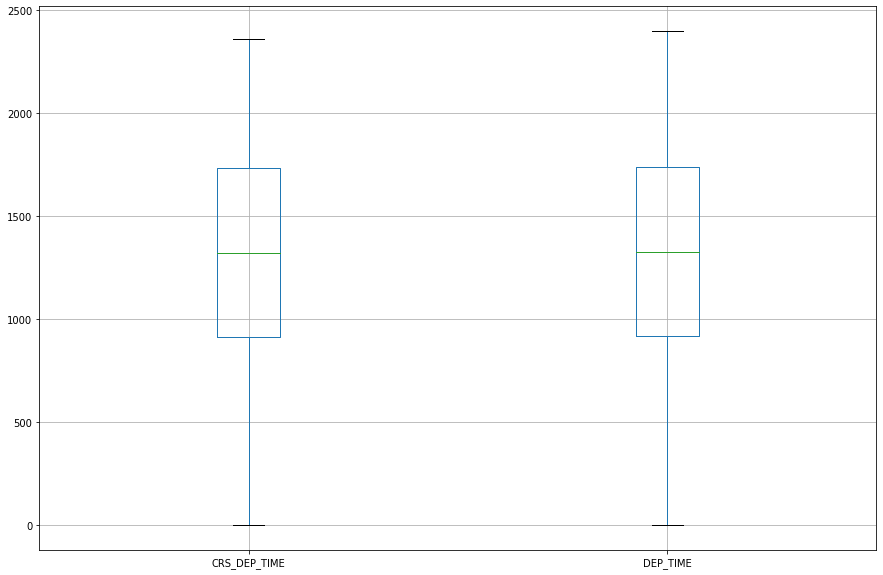

In [102]:
# Data Quality
# Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes?
# How do you deal with these problems? Give justifications for your methods.
df.boxplot(column=['CRS_DEP_TIME', 'DEP_TIME'], figsize=(15, 10))
# ax.set_yscale('log')

This boxplot shows the CRS_DEP_TIME (Computerized Reservation System) departure time and the departure time.  The CRS time is the time the airlines reservation EXPECTS the flight to depart (for CRS depature is considered when the aircraft leaves the gate).  If the software perfroms as expected it should closely match the actual departure time (DEP_TIME), and in general these two variables seem to match quite well.  

<AxesSubplot:>

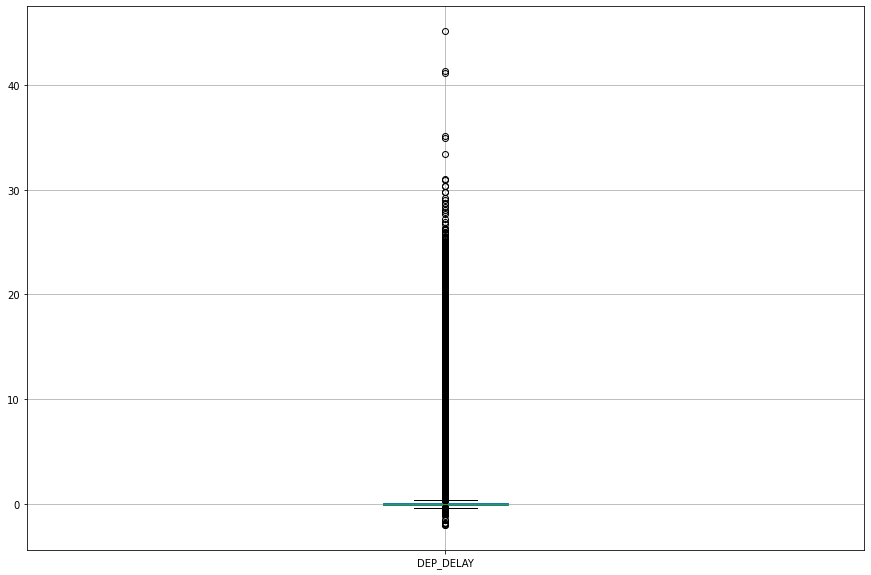

In [105]:
df.boxplot(column=['DEP_DELAY'], figsize=(15, 10))

This boxplot is to examine the frequency and distribution of departures delays.  This plot is important to tell our story because delays are cetainly on a scale, and this plot adequately shows the realtiveness of depature delays.  The huge majoiry of departure delays are on shoter end of the spectrum, an hour or less.  At the same time we can also have massive delays, and those data points pull our box plot out into the extremes, with the single biggest delay stretching over 40 hours.  The scale of this data is in hours.



Taxi In > 1 hour 6875
Taxi Out > 1 hour 49465


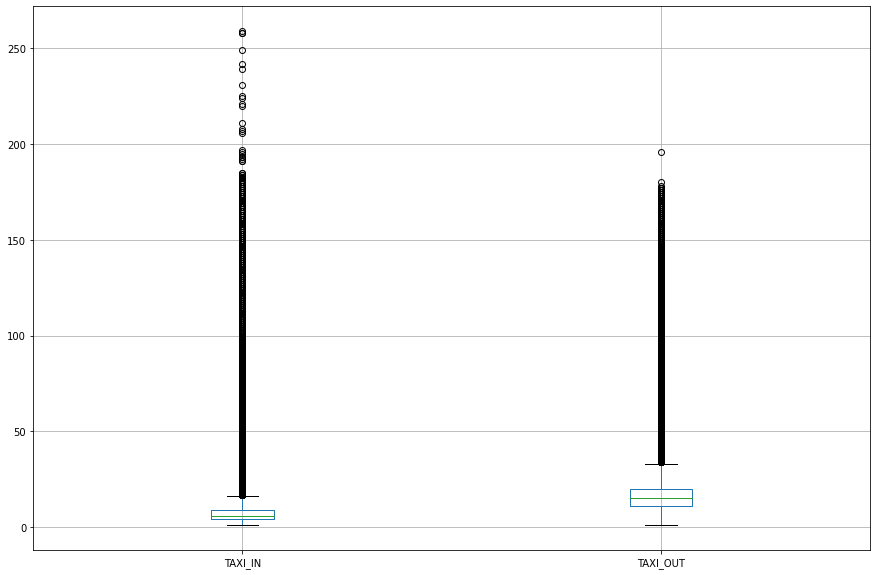

In [107]:
df.boxplot(column=['TAXI_IN', 'TAXI_OUT'], figsize=(15, 10))
print(f"Taxi In > 1 hour {df.TAXI_IN[df['TAXI_IN']>60].count()}")
print(f"Taxi Out > 1 hour {df.TAXI_OUT[df['TAXI_OUT']>60].count()}")

This plot shows taxi-in and taxi-out times, while the general trend of this is data is to have short times here, this is an interesting part of where delays can form.  These appear to be realistic values.  This could be the basis of the DOT to from a tarmac delay plan.  More information about this legislation available here: https://www.transportation.gov/individuals/aviation-consumer-protection/tarmac-delays#:~:text=During%20a%20tarmac%20delay%2C%20airlines%20must%20provide%20you%20with%20a,the%20case%20of%20an%20arrival).



<AxesSubplot:>

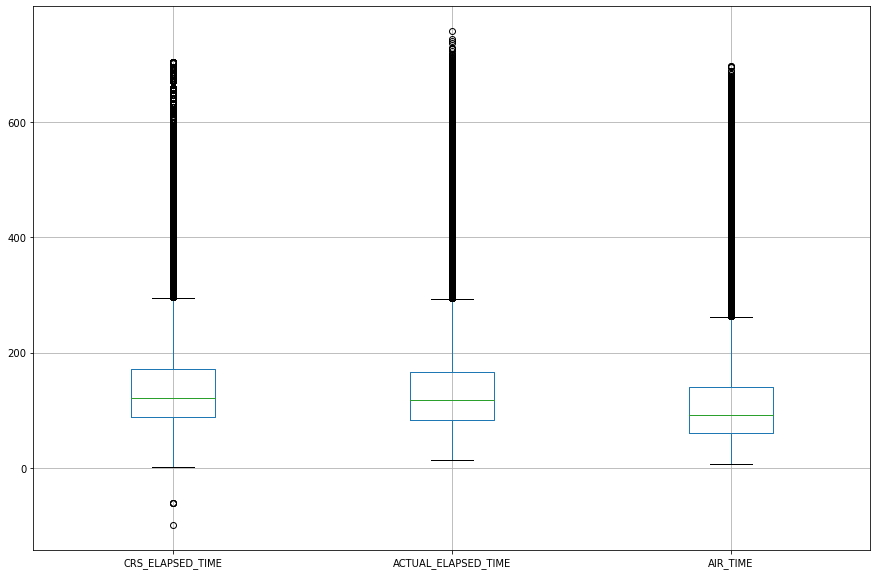

In [8]:
df.boxplot(column=['CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME'], figsize=(15, 10))

In this plot containing multiple box plots we can see the subjectively of judging delayed flights.  The first box-plot "CRS_ELAPSED_TIME" is based on the computerized reservations system (CRS) of the airline and is the scheduled amount of time the flight will take based on when the flight departs from the gate, this is hypothesized time.  ACTUAL_ELAPSED_TIME is the actual time the flight took after departure from the gate, CRS time and actual should be close, and it looks like for the most part they are, indicating that the software is doing a good time estimating.  AIR_TIME occurs from wheels_off to wheels_on time.  This should be shorter than CRS and ACTUAL time because those two metrics account for time on the ground.  This seems to be generally true.

<AxesSubplot:>

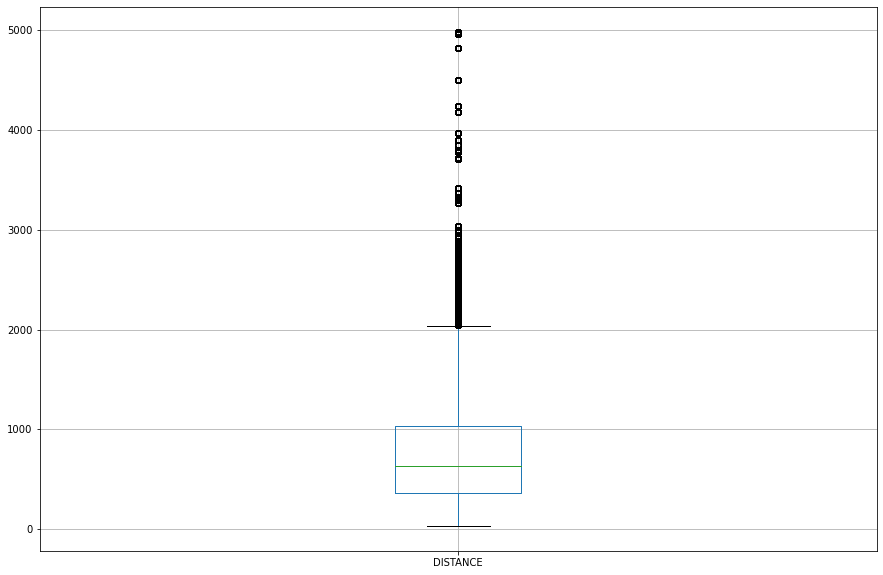

In [9]:
df.boxplot(column=['DISTANCE'], figsize=(15, 10))

This is a boxplot showing the DISTANCE variable.  This variable is the distance between airports.  NOTE: This is calculated using great circle distance, between two selected airports.  This is the best general answer to how far a flight is, actual routes may change.  With that said, this is an important chart as flight times are heavily dependent on distance travelled! This plot shows that most flights are >1000 miles, but like other varibles in this dataset we can see that we have plenty of flights that also greatly exceed this. 

<AxesSubplot:>

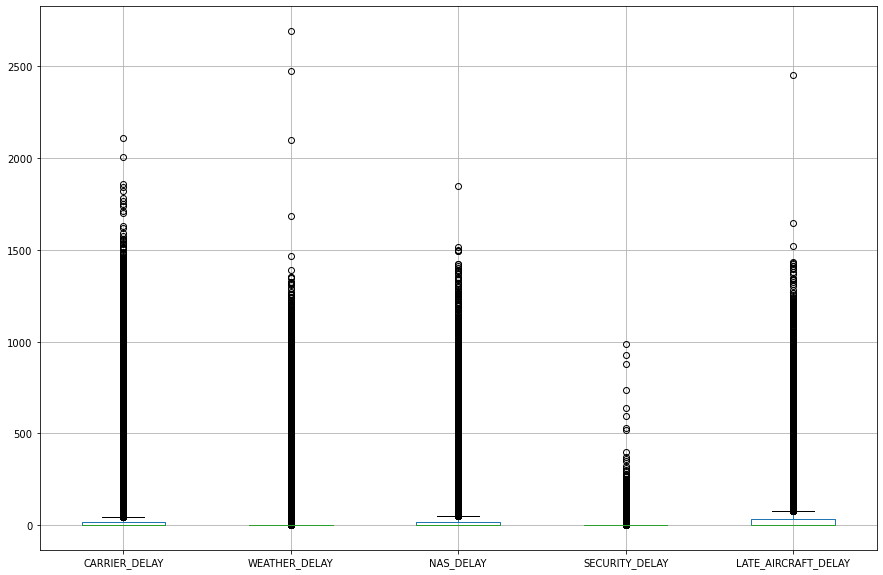

In [11]:
df.boxplot(column=['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], figsize=(15, 10))

This boxplot contains the infomration we are going to our analysis around.  This plot shows the category reasons for depature delays.

The first reason for delay is Carrier_delay, which encompasses any reason a carrier may delay a flight for its own interal purposes (ie. not the other delay causes listed in this chart) such as waiting for connecting passengers, maintenance delays, aircraft cleaning, aircraft damage, baggage, cargo loading, catering, computer, outage of carrier equipment, crew legality (pilot or attendant rest), inspection, fueling, handling disabled passengers, late crew, lavatory servicing, oversales, prtable water servicing, removal of unruly passengers, slow boarding or seating, stowing carry-on baggage, weight and balance delays.

The second reason for delay is NAS Delay: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET.

The third reason for delay is Security Delay: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

The fourth reason for delay is Weather Delay: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

The fifth reason for delay is OPSNET Delay Cause: Delays to Instrument Flight Rules (IFR) traffic of 15 minutes or more, experienced by individual flights, which result from the ATC system detaining an aircraft at the gate, short of the runway, on the runway, on a taxiway, and/or in a holding configuration anywhere en route.

Such delays include delays due to weather conditions at airports and en route (Weather), FAA and non-FAA equipment malfunctions (Equipment), the volume of traffic at an airport (Volume), reduction to runway capacity (Runway), and other factors (Others). Flight delays of less than 15 minutes are not reported in OPSNET. ASPM reports the most dominant OPSNET delay cause for any flight with an ASQP Reported NAS Delay.


For source of these explanations: https://aspmhelp.faa.gov/index/Types_of_Delay.html#:~:text=Examples%20of%20occurrences%20that%20may,damage%20by%20hazardous%20goods%2C%20engineering

# Simple Statistics

In this section we'll take a look at some simple statistics for a subset of our attributes.

<AxesSubplot:xlabel='OP_CARRIER', ylabel='Count'>

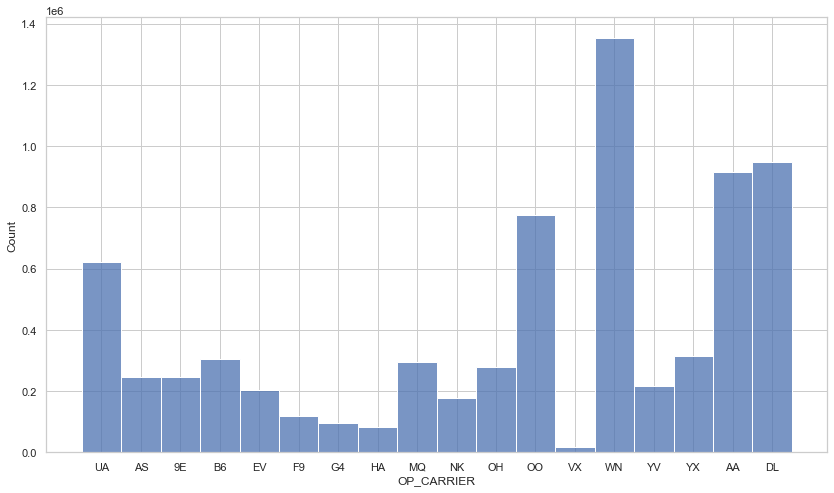

In [115]:
filter_data = df.dropna(subset=['OP_CARRIER'])
plt.figure(figsize=(14,8))
sns.histplot(filter_data['OP_CARRIER'], kde=False)

This histogram visualizes the counts of delays by operating carrier.  We can see how each carrier looks in term of frequency of departure delays.  Based on this plot we can see that WN (Southwest Airlines) has what seems like a clear lead in delays, but this could also indicate that they operate more flights than the other carriers and this might be an unfair comparison of airrlines in terms of delays, frequency of flights would also play well into this.  Overall this plot shows the overall frequency of departure delays. Below is an updated list of carriers:

AirTran
Alaska
America West
American
American Eagle
Atlantic Southeast
Comair
Continental
Delta
ExpressJet Airlines d/b/a Continental Express
Frontier
JetBlue
Mesa Airlines
Northwest
Pinnacle Airlines d/b/a Northwest Airlink
SkyWest
Southwest
United
US Airways

<AxesSubplot:ylabel='CANCELLATION_CODE'>

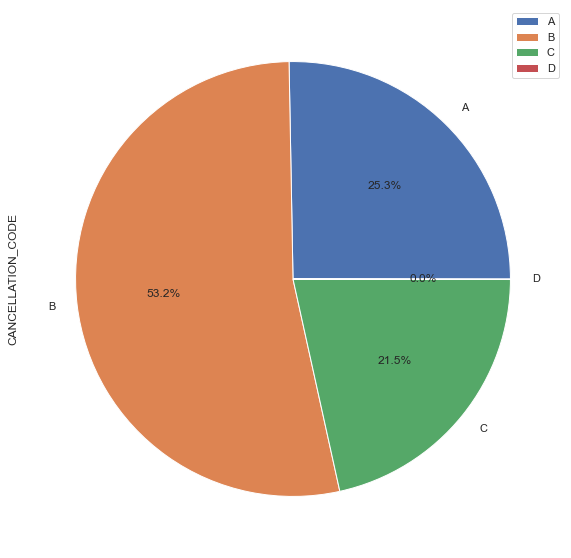

In [116]:


type_counts = df['CANCELLATION_CODE'].value_counts()
df2 = pd.DataFrame({'CANCELLATION_CODE': type_counts}, 
                     index = ['A', 'B', 'C','D']
                   )
df2.plot.pie(y='CANCELLATION_CODE', figsize=(10,10), autopct='%1.1f%%')


For this visualization of our summary statistics we look at the proportion of cancellations broken down by cancellation_code. 
This is a good perspective of the officical reason why depaetures are cancelled.  A big takeaway from this plot is that over half of the reasons for departure cancellations are weather related.  If you must blindy guess why a flight was delayed a good guess would be weather.  It is important to note here that this is relevant to cancellations only, not our outcome of interest, delays.

CANCELLATION CODES
A-Carrier Caused
B-Weather
C-National Aviation System
D-Security

# Visualize Attributes

### Distance

<AxesSubplot:ylabel='OP_CARRIER'>

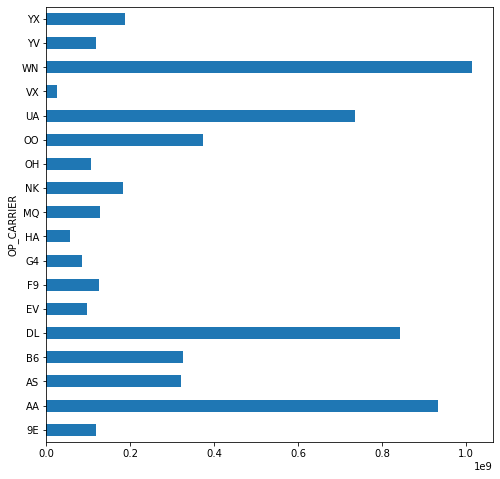

In [76]:
carrierDistance = df[df['DISTANCE']>0].groupby(['OP_CARRIER']).sum()['DISTANCE']
carrierDistance.plot(kind='barh', figsize=(8,8))

This attribute is interesting in many ways.  Here we look at the total miles each airline has flown in 2018.  This can also be broken down into which airline flies the longest or shortest routes.  The airline chosen will have an affect on on-time-arrival.  Some may be better at long flights, while others are better at short ones.

## Date

<AxesSubplot:ylabel='MONTH'>

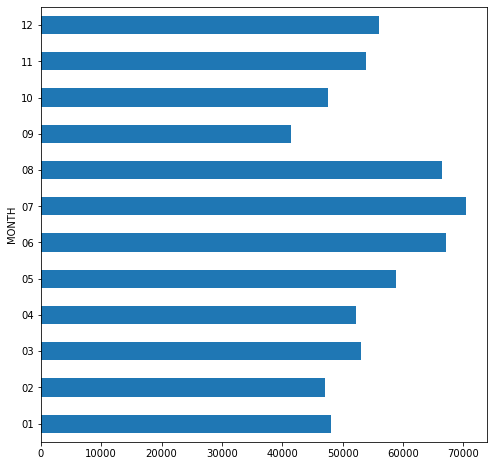

In [104]:
df['MONTH'] = df['FL_DATE'].str[5:7]
carrierDelayByMonth = df[df['CARRIER_DELAY']>0].groupby(['MONTH']).count()['CARRIER_DELAY']
carrierDelayByMonth.plot(kind='barh', figsize=(8,8))


Seasonal trends play a major factor in delays.  The above chart shows carrier delays by month.  We can perform further analysis, looking at the data as time series.

<AxesSubplot:>

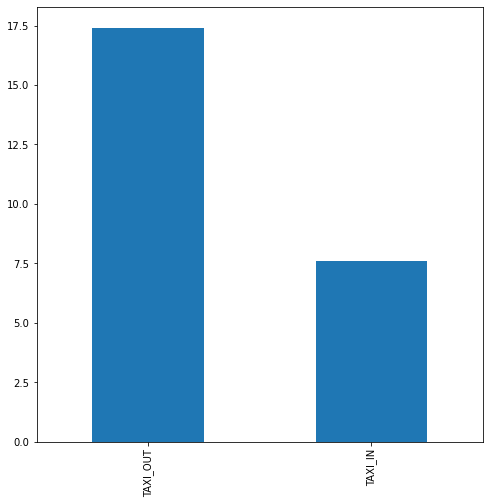

In [121]:
taxiData = df[['TAXI_OUT', 'TAXI_IN']].mean()
taxiData.plot(kind='bar', figsize=(8,8))

Add explanation

### Carrier Delays

<AxesSubplot:ylabel='OP_CARRIER'>

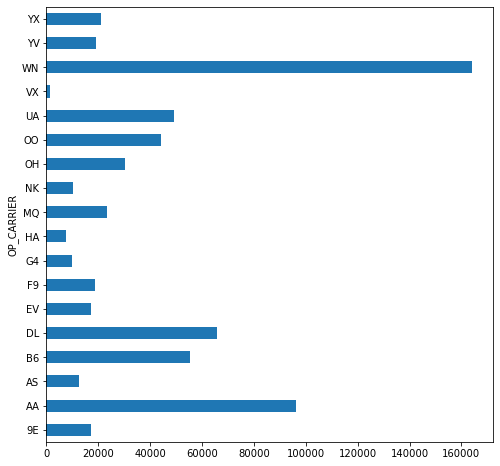

In [122]:
carrierDelays = df[df['CARRIER_DELAY']>0].groupby(['OP_CARRIER']).count()['CARRIER_DELAY']
carrierDelays.plot(kind='barh', figsize=(8,8))

It will be interesting to see if on-time-arrival is affected by the airline. To get a better idea of how the airlines perform is to look at delays that were caused by the airline and which airline has the most. Southwest Airlines (WN) has the most carrier delays. This is surprising due to Southwest having one of the best reputations in the airline industry.

### Histogram of CRS_Elapsed_Time and Actual_Elapsed_Time

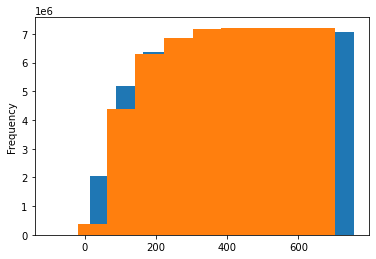

In [127]:
df["ACTUAL_ELAPSED_TIME"].plot.hist(orientation="vertical", cumulative=True);
df["CRS_ELAPSED_TIME"].plot.hist(orientation="vertical", cumulative=True);

In this stacked histogram we can see the very close relationship between the CRS_elapsed_time (Computer Reservation System) and the actual elapsed time.  This relationship is important because based on this visualization we can see that the reservation systems are typically accurate, this could be for a variety of reasons, and because of the sheer number of data points.

# Explore Joint Attributes

array([[<AxesSubplot:xlabel='CRS_DEP_TIME', ylabel='CRS_DEP_TIME'>,
        <AxesSubplot:xlabel='DEP_TIME', ylabel='CRS_DEP_TIME'>,
        <AxesSubplot:xlabel='DEP_DELAY', ylabel='CRS_DEP_TIME'>,
        <AxesSubplot:xlabel='TAXI_OUT', ylabel='CRS_DEP_TIME'>,
        <AxesSubplot:xlabel='WHEELS_OFF', ylabel='CRS_DEP_TIME'>],
       [<AxesSubplot:xlabel='CRS_DEP_TIME', ylabel='DEP_TIME'>,
        <AxesSubplot:xlabel='DEP_TIME', ylabel='DEP_TIME'>,
        <AxesSubplot:xlabel='DEP_DELAY', ylabel='DEP_TIME'>,
        <AxesSubplot:xlabel='TAXI_OUT', ylabel='DEP_TIME'>,
        <AxesSubplot:xlabel='WHEELS_OFF', ylabel='DEP_TIME'>],
       [<AxesSubplot:xlabel='CRS_DEP_TIME', ylabel='DEP_DELAY'>,
        <AxesSubplot:xlabel='DEP_TIME', ylabel='DEP_DELAY'>,
        <AxesSubplot:xlabel='DEP_DELAY', ylabel='DEP_DELAY'>,
        <AxesSubplot:xlabel='TAXI_OUT', ylabel='DEP_DELAY'>,
        <AxesSubplot:xlabel='WHEELS_OFF', ylabel='DEP_DELAY'>],
       [<AxesSubplot:xlabel='CRS_DEP_TIME', ylabel=

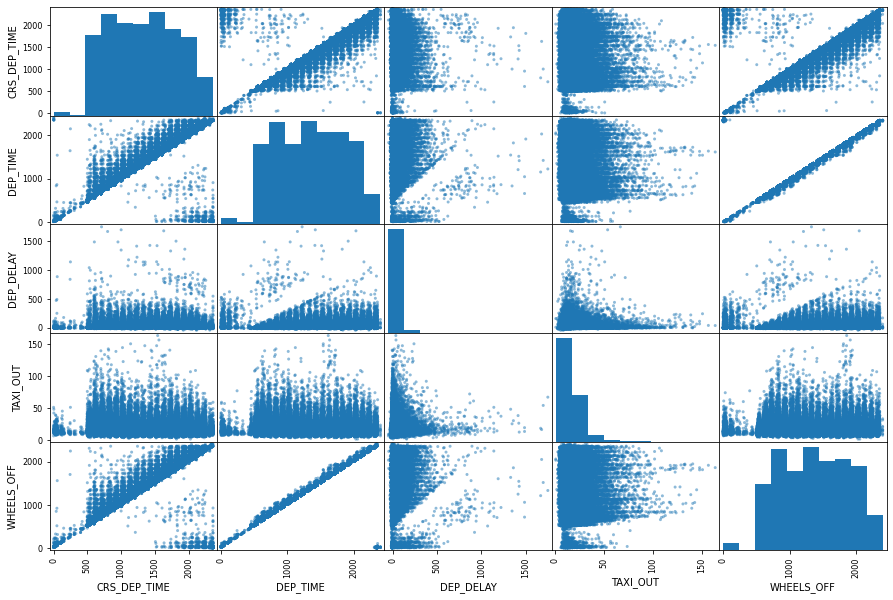

In [105]:
from pandas.plotting import scatter_matrix
dfPart = df.head(100000)
scatter_matrix(dfPart[['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF']], figsize=(15, 10))


We have variables related to departure and those related to arrival.  The departure variables are correlated in the same way as arrival variables.  For example, Expected Departure Time (CRS_DEP_TIME) and Actual Departure Time (DEP_TIME) have a strong correlation.  Expected Arrival Time (CRS_ARR_TIME) and Actual Arrival Time (ARR_TIME) have the same correlation.  Actual Departure Time (DEP_TIME) and WHEELS_OFF are essentially the same, as well as Actual Arrival Time (ARR_TIME) and WHEELS_ON.  

array([[<AxesSubplot:xlabel='CRS_ELAPSED_TIME', ylabel='CRS_ELAPSED_TIME'>,
        <AxesSubplot:xlabel='ACTUAL_ELAPSED_TIME', ylabel='CRS_ELAPSED_TIME'>,
        <AxesSubplot:xlabel='AIR_TIME', ylabel='CRS_ELAPSED_TIME'>,
        <AxesSubplot:xlabel='DISTANCE', ylabel='CRS_ELAPSED_TIME'>],
       [<AxesSubplot:xlabel='CRS_ELAPSED_TIME', ylabel='ACTUAL_ELAPSED_TIME'>,
        <AxesSubplot:xlabel='ACTUAL_ELAPSED_TIME', ylabel='ACTUAL_ELAPSED_TIME'>,
        <AxesSubplot:xlabel='AIR_TIME', ylabel='ACTUAL_ELAPSED_TIME'>,
        <AxesSubplot:xlabel='DISTANCE', ylabel='ACTUAL_ELAPSED_TIME'>],
       [<AxesSubplot:xlabel='CRS_ELAPSED_TIME', ylabel='AIR_TIME'>,
        <AxesSubplot:xlabel='ACTUAL_ELAPSED_TIME', ylabel='AIR_TIME'>,
        <AxesSubplot:xlabel='AIR_TIME', ylabel='AIR_TIME'>,
        <AxesSubplot:xlabel='DISTANCE', ylabel='AIR_TIME'>],
       [<AxesSubplot:xlabel='CRS_ELAPSED_TIME', ylabel='DISTANCE'>,
        <AxesSubplot:xlabel='ACTUAL_ELAPSED_TIME', ylabel='DISTANCE'>,
     

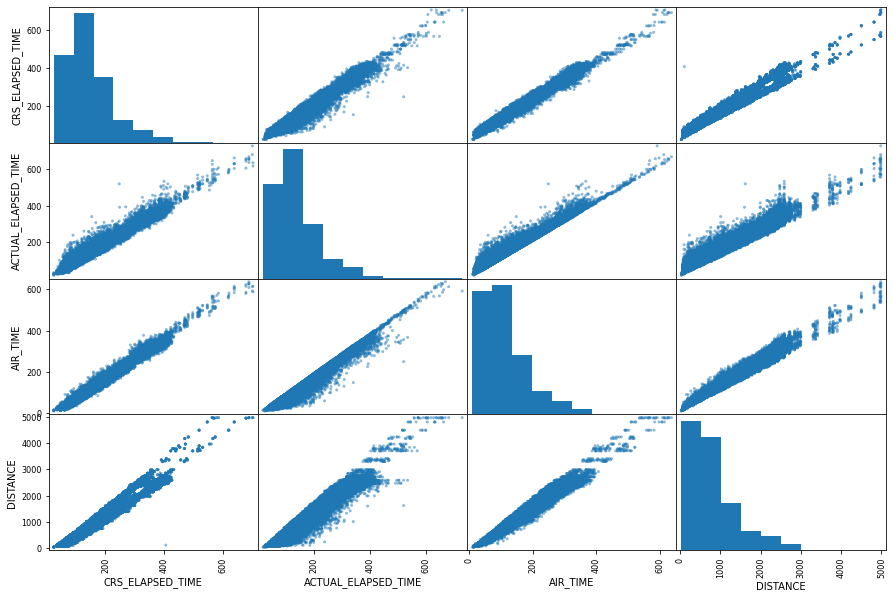

In [37]:
scatter_matrix(dfPart[['CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE']], figsize=(15, 10))

These variables are all related to the amount of between departure and arrival at the destination. Notice the strong linear correlation between each.  Differences in the Expected Elapsed Time (CRS_ELAPSED_TIME) and Actual Elapsed Time show how often the aircraft have hit or missed the mark.  This could help with prediction.

# Explore Attributes and Class

array([[<AxesSubplot:xlabel='CARRIER_DELAY', ylabel='CARRIER_DELAY'>,
        <AxesSubplot:xlabel='DEP_DELAY', ylabel='CARRIER_DELAY'>,
        <AxesSubplot:xlabel='ARR_DELAY', ylabel='CARRIER_DELAY'>],
       [<AxesSubplot:xlabel='CARRIER_DELAY', ylabel='DEP_DELAY'>,
        <AxesSubplot:xlabel='DEP_DELAY', ylabel='DEP_DELAY'>,
        <AxesSubplot:xlabel='ARR_DELAY', ylabel='DEP_DELAY'>],
       [<AxesSubplot:xlabel='CARRIER_DELAY', ylabel='ARR_DELAY'>,
        <AxesSubplot:xlabel='DEP_DELAY', ylabel='ARR_DELAY'>,
        <AxesSubplot:xlabel='ARR_DELAY', ylabel='ARR_DELAY'>]],
      dtype=object)

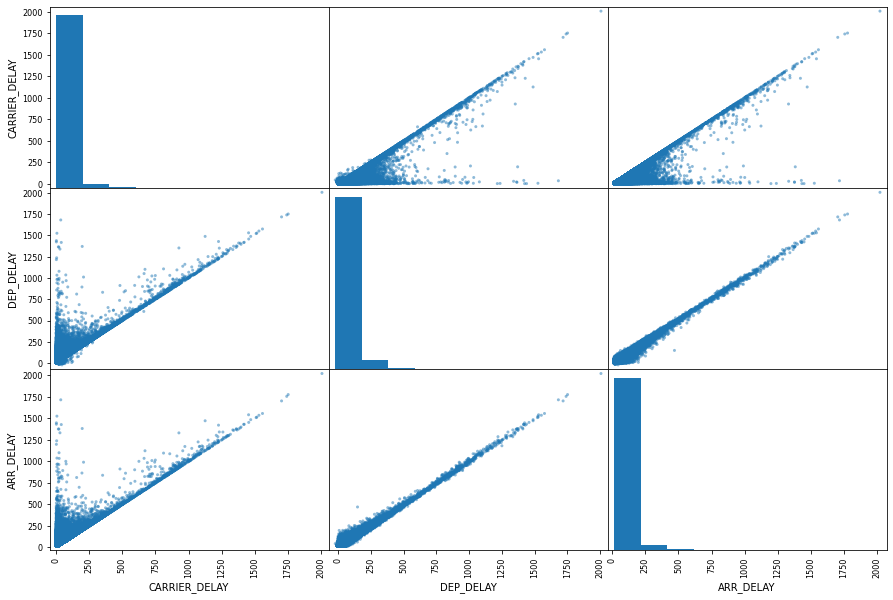

In [108]:
dfCarrier = df[df['CARRIER_DELAY'] > 0].head(100000)
scatter_matrix(dfCarrier[['CARRIER_DELAY', 'DEP_DELAY', 'ARR_DELAY']], figsize=(15, 10))

The five types of delays, Carrier, Weather, Security, Nas (system delay), and Late Aircraft are somewhat redundant with respect to Departure Delay (DEP_DELAY) and Arrival Delay (ARR_DELAY).  If we simply want to know whether there was a delay, we can look at Departure and Arrival delays.  A departure delay does not necessarily mean that there is an arrival delay.  A weather delay can occure while the aircraft is in flight.  Here we have the relationship between Carrier Delay, Departure Delay, and Arrival Delay.  The other four types of delays have the same relationship with departure and arrival.

# New Features

In [114]:
conditions = [
    (df['CRS_ARR_TIME'] >= df['ARR_TIME']),
    (df['CRS_ARR_TIME'] < df['ARR_TIME'])]
choices = [1, 0]

df['ON_TIME_ARRIVAL'] = np.select(conditions, choices, default='null')
df[['CRS_ARR_TIME', 'ARR_TIME', 'MONTH', 'ON_TIME_ARRIVAL']].head()


,CRS_ARR_TIME,ARR_TIME,MONTH,ON_TIME_ARRIVAL
0,1745,1722.0,01,1
1,1254,1230.0,01,1
2,1649,1636.0,01,1
3,1756,1754.0,01,1
4,922,936.0,01,0


A Month column was also added above.  This helps with prediction.  There are more flights during holidays and vacation season.  This can have a negative effect on On-Time-Arrival.

A column for On-Time-Arrival will be added.  This shows the result of the flight.  Delays don't necessarily mean that the flight arrived late.  They hurt NPS scores and cause poor ratings on customer satisfaction surveys.  Which is more important, flights without delays, or just getting there on time depends on the customer.

# Exceptional Work

There are two members in our group.  As per our discussion, it took longer to complete the required tasks than the other groups.